<a href="https://colab.research.google.com/github/bhyun-kim/crack_gauge/blob/main/Crack_Gauge_AI_Inference_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference Demo of Crack Gauge AI

### Check GPU instance

In [1]:
# check GPU specs
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Check PyTorch version

In [2]:
!pip show torch

Name: torch
Version: 2.0.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision, triton


### Clone Crack Gauge AI from GitHub Repository

Clone repository.

In [3]:
!git clone https://github.com/bhyun-kim/crack_gauge.git

Cloning into 'crack_gauge'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 340 (delta 140), reused 203 (delta 68), pack-reused 0
Receiving objects: 100% (340/340), 869.22 KiB | 9.55 MiB/s, done.
Resolving deltas: 100% (140/140), done.


Move to the cloned folder.

In [4]:
%cd crack_gauge/
!ls

/content/crack_gauge
assets	 datasets  install.md  README.md	 setup.py  tools
configs  demo	   LICENSE     requirements.txt  tests


### Install the required packages

Install openmim dependencies

In [5]:
# install required packages
# -q to reduce down printing long installation log
!pip install openmim # -q
!mim install mmengine # -q
!mim install mmcv # -q
!mim install mmpretrain # -q
!mim install mmsegmentation # -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.5/437.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 15.3 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 7.0 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.5 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.5/926.5 kB 19.1 MB/s eta 0:00:00


Install from requirements.txt

In [6]:
!pip install -r requirements.txt
!python setup.py develop

running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running egg_info
creating Crack_GAIGE.egg-info
writing manifest file 'Crack_GAIGE.egg-info/SOURCES.txt'
writing manifest file 'Crack_GAIGE.egg-info/SOURCES.txt'
running build_ext


In [7]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [56]:
!wget -O iter_14000.pth  https://www.dropbox.com/scl/fi/9j4nkxf0u7yg6pmy3ddq0/iter_14000.pth?rlkey=m7a3q3g32wdsdc1e74rsxjq3c&dl=0

--2023-08-25 07:08:08--  https://www.dropbox.com/scl/fi/9j4nkxf0u7yg6pmy3ddq0/iter_14000.pth?rlkey=m7a3q3g32wdsdc1e74rsxjq3c
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/9j4nkxf0u7yg6pmy3ddq0/iter_14000.pth?rlkey=m7a3q3g32wdsdc1e74rsxjq3c [following]
--2023-08-25 07:08:08--  https://www.dropbox.com/e/scl/fi/9j4nkxf0u7yg6pmy3ddq0/iter_14000.pth?rlkey=m7a3q3g32wdsdc1e74rsxjq3c
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e1f386ceb920893f668239007.dl.dropboxusercontent.com/cd/0/inline/CCfea7VVw8QpRD7kT3vwGImbnwvzryr_xTTIgvBOAFbtAdeELD20xro6Bui_FoV7BEstvhLf6TefFLWf-nbq1FAcG17gvc-R5UB0YZWqA5ZOAPjqQWlqjjMWekSGcMRJTuN9nyU7Y9d81_tbtnIiZo2p/file# [following]
--2023-08-25 07:08:09--  https://uc1e1f386ceb920

In [57]:
config_file = 'configs/deep_crack/cgent_1024x1024.py'
checkpoint_file = 'iter_14000.pth'

In [58]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cpu')

Loads checkpoint by local backend from path: iter_14000.pth


/usr/local/lib/python3.10/dist-packages/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [60]:
# test a single image
import mmcv
img_path = 'demo/streamlit/crack.jpg'
img = mmcv.imread(img_path)

if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


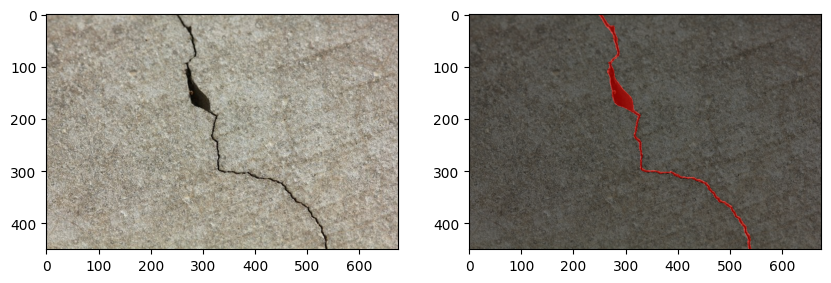

In [61]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False)

# subplot img, vis_result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img[:, :, [2, 1, 0]])
plt.subplot(1, 2, 2)
plt.imshow(vis_result[:, :, [2, 1, 0]])